In [10]:
X_poly

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.]])

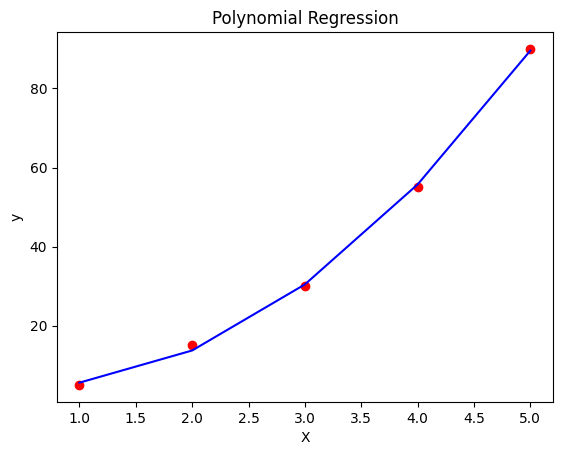

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1,1)
y = np.array([5, 15, 30, 55, 90])

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_poly, y)

# Predict
y_pred = model.predict(X_poly)

# Plot
plt.scatter(X, y, color='red')
plt.plot(X, y_pred, color='blue')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [4]:
y_pred

array([ 5.57142857, 13.71428571, 30.42857143, 55.71428571, 89.57142857])

scores obtained after every cross validation[-26.39652556  -9.97966982  -4.55490068   0.47709457 -26.27157966]
mean of scores obtained after every cross validation-13.34511622982256
list is appended with the mean  of scores obtained after every cross validation[-13.34511622982256]
Degree 1: Mean Cross-Validated R² = -13.3451
scores obtained after every cross validation[-10.38654979  -3.86056493   0.29377338  -1.21971475 -81.52365356]
mean of scores obtained after every cross validation-19.339341930802394
list is appended with the mean  of scores obtained after every cross validation[-13.34511622982256, -19.339341930802394]
Degree 2: Mean Cross-Validated R² = -19.3393
scores obtained after every cross validation[ -1.72816542   0.35385704   0.81126325   0.77823834 -28.14253092]
mean of scores obtained after every cross validation-5.585467542957224
list is appended with the mean  of scores obtained after every cross validation[-13.34511622982256, -19.339341930802394, -5.585467542957224]
D

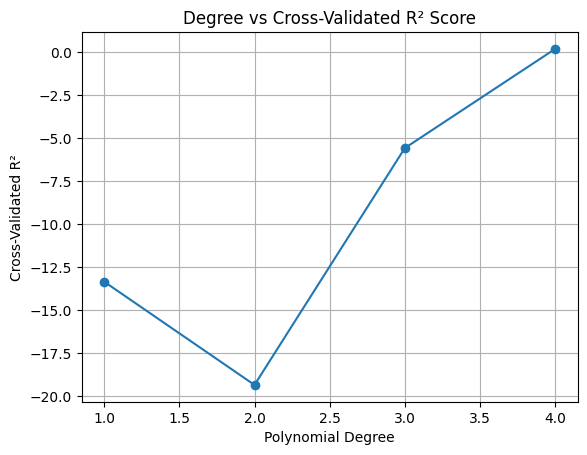

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

# Step 1: Create synthetic non-linear data
np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)  # 100 points between 0 and 5
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # sin(x) + small noise

# Step 2: Try different polynomial degrees
degrees = [1, 2, 3, 4]
cv_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    
    model = LinearRegression()
    scores = cross_val_score(model, X_poly, y, scoring='r2', cv=5)
    print(f"scores obtained after every cross validation{scores}")
    mean_r2 = scores.mean()
    print(f"mean of scores obtained after every cross validation{mean_r2}")
    cv_scores.append(mean_r2)
    print(f"list is appended with the mean  of scores obtained after every cross validation{cv_scores}")

    print(f"Degree {degree}: Mean Cross-Validated R² = {mean_r2:.4f}")
    
# Find best degree
best_degree = degrees[np.argmax(cv_scores)]
print(f"the index with maximum value of r2 is {np.argmax(cv_scores)}")
best_score = max(cv_scores)

# Print
print(f"\nBest Degree is {best_degree} with Mean Cross-Validated R² = {best_score:.4f}")
print(f"THis is the list of all the scored obtained {cv_scores}")
# Step 3: Plot Degree vs Cross-Validated R²
plt.plot(degrees, cv_scores, marker='o')
plt.title('Degree vs Cross-Validated R² Score')
plt.xlabel('Polynomial Degree')
plt.ylabel('Cross-Validated R²')
plt.grid(True)
plt.show()


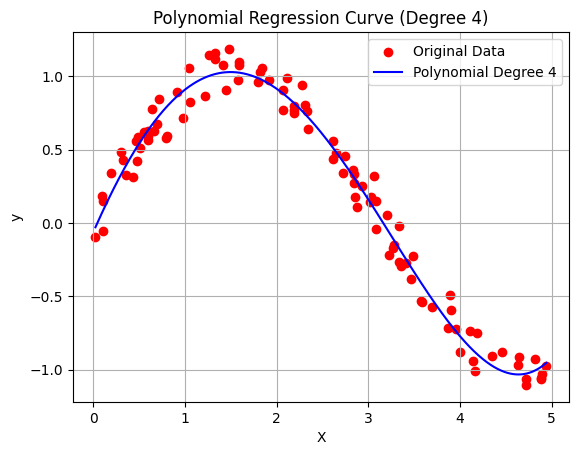

In [14]:
poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Step 2: Create smoother curve for plotting
X_smooth = np.linspace(X.min(), X.max(), 500).reshape(-1,1)  # more points for smoother curve
X_smooth_poly = poly.transform(X_smooth)
y_smooth_pred = model.predict(X_smooth_poly)

# Step 3: Plot
plt.scatter(X, y, color='red', label='Original Data')
plt.plot(X_smooth, y_smooth_pred, color='blue', label=f'Polynomial Degree {best_degree}')
plt.title(f'Polynomial Regression Curve (Degree {best_degree})')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()